In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../definitions')
import def_model as mod_def
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

Proportion of storm to no storm is:  0.10526315789473684 %
    Z_SQUID   NS_Fluxgate  EW_Fluxgate    Z_Fluxgate   H Component
0  0.263233  10934.303393   -42.359410 -22656.440907  10934.385443
1  0.317575  10934.335773   -42.639808 -22656.444363  10934.418915
2  0.255518  10934.388935   -42.276737 -22656.497270  10934.470664
3  0.289818  10934.401460   -42.308557 -22656.484653  10934.483313
4  0.255207  10934.392687   -42.265653 -22656.573902  10934.474373
This is the shape: (149873, 5)


<Axes: >

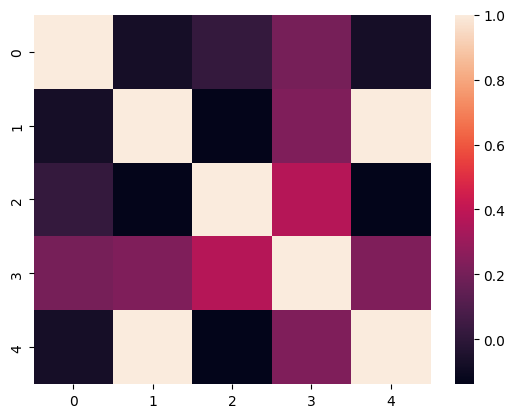

In [6]:
start_date = pd.Timestamp('2024-03-20')
end_date = pd.Timestamp('2024-04-09')


df = mod_def.combine_resampled_data(start_date, end_date)
df = df.iloc[:, 1:6]
print(df.head())
print(f"This is the shape:" ,df.shape)

#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data


#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())

In [7]:
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,0.277399,-1.506799,0.919335
1,0.274460,-1.497781,0.911956
2,0.273771,-1.507020,0.921357
3,0.272802,-1.506502,0.920277
4,0.274578,-1.504739,0.921551


<Axes: >

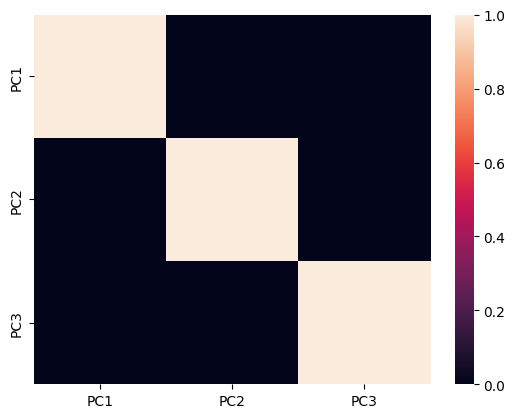

In [8]:


#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())